# General Package Imports

In [79]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import collections
import nltk
import wordcloud
import matplotlib.pyplot as plt # we only need pyplot
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from textblob import TextBlob
import random
import re

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [2]:
#read data from the csv file (Abhigyan's CSV file)
data = pd.read_csv("/Users/abhishekvaidyanathan/Desktop/NLP-project1/reviewSelected100.csv")

In [3]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [4]:
data['business_id'].nunique()

153

# Functions Required for each specification

In [5]:
def remove_stopwords(tokenized_sentence):
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in tokenized_sentence if not w.lower() in stop_words]
    filtered_sentence = []
    for w in tokenized_sentence:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

In [6]:
def tokenisation(sentence):
    word_tokens_with_stop = word_tokenize(sentence)
    word_tokens=remove_stopwords(word_tokens_with_stop)
    return word_tokens

In [7]:
def nltk_pos_tagging(sentence):
    tokenised_sentence=tokenisation(sentence)
    Pos_Tag_Sentence=nltk.pos_tag(tokenised_sentence)
    return Pos_Tag_Sentence

In [8]:
def sentence_tokenizer(sentence):
    tokenised_sentence = []
    tokenised_sentence = sent_tokenize(sentence)
    return tokenised_sentence

In [9]:
def tokenize_sentences(sentence_array):
    sentence_tokens = []
    for sentences in sentence_array:
        tokenize_sent = nltk_pos_tagging(sentences)
        sentence_tokens.append(tokenize_sent)
    return sentence_tokens

In [82]:
def get_text_sentiment(lyrics):
  analysis = TextBlob(lyrics)
  return analysis.sentiment.polarity

In [99]:
def get_sentence_sentiment(sentence_array):
    sentences_sentiment = []
    for sentences in sentence_array:
        sentiment = get_text_sentiment(sentences)
        sentences_sentiment.append(sentiment)
    return sentences_sentiment

In [110]:
def count_noun_adjective_pairs(sentence_array,sentiment_array):
    count_array = []
    i = 0
    for pos_tags_array in sentence_array:
        pos_tags_count_array = []
        for pos_tags in range(len(pos_tags_array)):
            if ((pos_tags_array[pos_tags][1]) == "NN"):
                for pos_tags_next in range(pos_tags+1,len(pos_tags_array)):
                    if (pos_tags_array[pos_tags_next][1]=="JJ"):
                        pos_tags_count_array.append([pos_tags_array[pos_tags][0],pos_tags_array[pos_tags_next][0]])
        count_array.append([pos_tags_count_array,len(pos_tags_count_array),sentiment_array[i]])
        i = i+1

    return count_array

In [114]:
def extract_all_noun_adjective_pairs(noun_adjective_pairs,all_noun_adjective_pairs,all_noun_adjective_sentiments):
    for all_pairs in noun_adjective_pairs:
        if (all_pairs[0]!=[]):
            all_noun_adjective_pairs.extend(all_pairs[0])
            for i in range(all_pairs[1]):
                all_noun_adjective_sentiments.append(all_pairs[2])

In [12]:
def convert_list_to_tuple(all_noun_adjective_pairs):
    for i in range(len(all_noun_adjective_pairs)):
        all_noun_adjective_pairs[i] = tuple(all_noun_adjective_pairs[i])

    return all_noun_adjective_pairs

In [158]:
def get_most_common_word_pair(all_noun_adjective_pairs_tuple,top_k,indexes):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    final_list = counter.most_common(top_k)
    for i in range(len(all_noun_adjective_pairs_tuple)):
        for j in final_list:
            if(all_noun_adjective_pairs_tuple[i]==j[0]):
                indexes.append(i)
    return final_list

In [14]:
def get_count_for_specific_word_pairs(all_noun_adjective_pairs_tuple,key_value):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    return dict1[key_value]

In [15]:
def get_count_and_common_word_pairs(tuple1,tuple2):
    list1_as_set = set(tuple1)
    intersection = list1_as_set.intersection(tuple2)
    intersection_as_list = list(intersection)
    for common_elements in intersection_as_list:
        count1 = get_count_for_specific_word_pairs(tuple1,common_elements)
        count2 = get_count_for_specific_word_pairs(tuple2,common_elements)
        print("The common element is ",common_elements,". The count from from each of the tuples are: ",str([count1,count2]),".")


In [162]:
def get_top_frequent_pairs_words(data_rating,top_k):
    all_noun_adjective_pairs_rating = []
    all_noun_adjective_sentiments = []
    indexes = []
    data_rating.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_sentiments),axis=1)
    all_noun_adjective_pairs__rating_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)
    top_frequent_pairs_rating = [get_most_common_word_pair(all_noun_adjective_pairs__rating_tuple,top_k,indexes)]
    top_frequent_pairs_rating.append(indexes)
    top_frequent_pairs_rating.append(all_noun_adjective_sentiments)
    return (top_frequent_pairs_rating)

In [17]:
def barplot_for_the_frequent_word_pairs(data,top_k):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    frequency = []
    word_pairs = []
    for i in get_top_frequent_pairs_words(data,top_k):
        frequency.append(str(i[0]))
        word_pairs.append(int(i[1]))
    ax.bar(tuple(frequency),tuple(word_pairs))
    ax.set_ylabel('frequency')
    ax.set_xlabel('Word Pairs')
    ax.set_title('frequence of top '+str(top_k)+' word pairs')
    plt.xticks(rotation='vertical')
    plt.show()

In [18]:
def show_wordclouds(data, title):
    text = ' '.join(data['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600, collocations=False).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

# Implementation To Get Noun-Adjective Pairs From 50 Random Reviews Rated 1 

In [89]:
data_rating_1 = data[data['stars']==1]
data_random_new = data_rating_1.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_50_rating_1 = data_random_new.sample(50)
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
69,SJXlxhOIptshFkqz9zXd6w,W5TiyIe6p4Qo_rjbtJ5bjg,XGaa9NDCwOJ9v0Cj55p28w,1,0,0,0,"very poor. I went into bar, ordered a beer and...",2018-05-31 01:23:22
107,cdktoe7Vfzds8FDmuLkZ0Q,heqV8fuYyjDCyRHp9GFmlw,mSqR24h_nKXyMhwtWSih3Q,1,1,0,1,"It is a very bad experience. I came in today, ...",2016-09-09 00:33:33
54,t8jGsWXuFt0NQGNtAqzUQg,tMbNBTPLlx3UQMY2Zc8_7A,QxRKQ_Lzu4lMOejwVgcdAg,1,1,1,0,We stopped in here the other night because BJ'...,2015-07-15 11:39:09
141,NkSdtw3BQVCxCkAj38nWgg,9UWmnhMdGqEM_LfO5QEUGw,y3otpml08iLWdX5RCrWnbA,1,0,0,0,Poorly executed cheap ingredients. Arrogant se...,2018-09-05 00:45:24
84,EjbC74oFvnIuuecmRKc6eQ,zJEqqOssotbPomk8yzGHQA,caq9CTtWB-8K0tdFUhTfAQ,1,1,0,0,Food is great as always but my whole family to...,2017-05-07 20:41:01


In [90]:
data_random_50_rating_1.shape

(50, 9)

In [91]:
data_random_50_rating_1['pos_tags'] = data_random_50_rating_1.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)

In [92]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
69,SJXlxhOIptshFkqz9zXd6w,W5TiyIe6p4Qo_rjbtJ5bjg,XGaa9NDCwOJ9v0Cj55p28w,1,0,0,0,"very poor. I went into bar, ordered a beer and...",2018-05-31 01:23:22,"[(poor, JJ), (., .), (I, PRP), (went, VBD), (b..."
107,cdktoe7Vfzds8FDmuLkZ0Q,heqV8fuYyjDCyRHp9GFmlw,mSqR24h_nKXyMhwtWSih3Q,1,1,0,1,"It is a very bad experience. I came in today, ...",2016-09-09 00:33:33,"[(It, PRP), (bad, JJ), (experience, NN), (., ...."
54,t8jGsWXuFt0NQGNtAqzUQg,tMbNBTPLlx3UQMY2Zc8_7A,QxRKQ_Lzu4lMOejwVgcdAg,1,1,1,0,We stopped in here the other night because BJ'...,2015-07-15 11:39:09,"[(We, PRP), (stopped, VBD), (night, NN), (BJ, ..."
141,NkSdtw3BQVCxCkAj38nWgg,9UWmnhMdGqEM_LfO5QEUGw,y3otpml08iLWdX5RCrWnbA,1,0,0,0,Poorly executed cheap ingredients. Arrogant se...,2018-09-05 00:45:24,"[(Poorly, RB), (executed, VBN), (cheap, JJ), (..."
84,EjbC74oFvnIuuecmRKc6eQ,zJEqqOssotbPomk8yzGHQA,caq9CTtWB-8K0tdFUhTfAQ,1,1,0,0,Food is great as always but my whole family to...,2017-05-07 20:41:01,"[(Food, NNP), (great, JJ), (always, RB), (whol..."


In [93]:
data_random_50_rating_1['text_sentiment'] = data_random_50_rating_1.apply(lambda row: get_text_sentiment(row['text']), axis=1)

In [94]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
69,SJXlxhOIptshFkqz9zXd6w,W5TiyIe6p4Qo_rjbtJ5bjg,XGaa9NDCwOJ9v0Cj55p28w,1,0,0,0,"very poor. I went into bar, ordered a beer and...",2018-05-31 01:23:22,"[(poor, JJ), (., .), (I, PRP), (went, VBD), (b...",-0.103889
107,cdktoe7Vfzds8FDmuLkZ0Q,heqV8fuYyjDCyRHp9GFmlw,mSqR24h_nKXyMhwtWSih3Q,1,1,0,1,"It is a very bad experience. I came in today, ...",2016-09-09 00:33:33,"[(It, PRP), (bad, JJ), (experience, NN), (., ....",0.095667
54,t8jGsWXuFt0NQGNtAqzUQg,tMbNBTPLlx3UQMY2Zc8_7A,QxRKQ_Lzu4lMOejwVgcdAg,1,1,1,0,We stopped in here the other night because BJ'...,2015-07-15 11:39:09,"[(We, PRP), (stopped, VBD), (night, NN), (BJ, ...",0.139286
141,NkSdtw3BQVCxCkAj38nWgg,9UWmnhMdGqEM_LfO5QEUGw,y3otpml08iLWdX5RCrWnbA,1,0,0,0,Poorly executed cheap ingredients. Arrogant se...,2018-09-05 00:45:24,"[(Poorly, RB), (executed, VBN), (cheap, JJ), (...",-0.140278
84,EjbC74oFvnIuuecmRKc6eQ,zJEqqOssotbPomk8yzGHQA,caq9CTtWB-8K0tdFUhTfAQ,1,1,0,0,Food is great as always but my whole family to...,2017-05-07 20:41:01,"[(Food, NNP), (great, JJ), (always, RB), (whol...",0.504167


In [95]:
data_random_50_rating_1['sentence tokenizer'] = data_random_50_rating_1.apply(lambda row: sentence_tokenizer(row['text']),axis=1)

In [96]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
69,SJXlxhOIptshFkqz9zXd6w,W5TiyIe6p4Qo_rjbtJ5bjg,XGaa9NDCwOJ9v0Cj55p28w,1,0,0,0,"very poor. I went into bar, ordered a beer and...",2018-05-31 01:23:22,"[(poor, JJ), (., .), (I, PRP), (went, VBD), (b...",-0.103889,"[very poor., I went into bar, ordered a beer a..."
107,cdktoe7Vfzds8FDmuLkZ0Q,heqV8fuYyjDCyRHp9GFmlw,mSqR24h_nKXyMhwtWSih3Q,1,1,0,1,"It is a very bad experience. I came in today, ...",2016-09-09 00:33:33,"[(It, PRP), (bad, JJ), (experience, NN), (., ....",0.095667,"[It is a very bad experience., I came in today..."
54,t8jGsWXuFt0NQGNtAqzUQg,tMbNBTPLlx3UQMY2Zc8_7A,QxRKQ_Lzu4lMOejwVgcdAg,1,1,1,0,We stopped in here the other night because BJ'...,2015-07-15 11:39:09,"[(We, PRP), (stopped, VBD), (night, NN), (BJ, ...",0.139286,[We stopped in here the other night because BJ...
141,NkSdtw3BQVCxCkAj38nWgg,9UWmnhMdGqEM_LfO5QEUGw,y3otpml08iLWdX5RCrWnbA,1,0,0,0,Poorly executed cheap ingredients. Arrogant se...,2018-09-05 00:45:24,"[(Poorly, RB), (executed, VBN), (cheap, JJ), (...",-0.140278,"[Poorly executed cheap ingredients., Arrogant ..."
84,EjbC74oFvnIuuecmRKc6eQ,zJEqqOssotbPomk8yzGHQA,caq9CTtWB-8K0tdFUhTfAQ,1,1,0,0,Food is great as always but my whole family to...,2017-05-07 20:41:01,"[(Food, NNP), (great, JJ), (always, RB), (whol...",0.504167,[Food is great as always but my whole family t...


In [97]:
data_random_50_rating_1["sentence_tokens_pos_tags"] = data_random_50_rating_1.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)

In [98]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
69,SJXlxhOIptshFkqz9zXd6w,W5TiyIe6p4Qo_rjbtJ5bjg,XGaa9NDCwOJ9v0Cj55p28w,1,0,0,0,"very poor. I went into bar, ordered a beer and...",2018-05-31 01:23:22,"[(poor, JJ), (., .), (I, PRP), (went, VBD), (b...",-0.103889,"[very poor., I went into bar, ordered a beer a...","[[(poor, JJ), (., .)], [(I, PRP), (went, VBD),..."
107,cdktoe7Vfzds8FDmuLkZ0Q,heqV8fuYyjDCyRHp9GFmlw,mSqR24h_nKXyMhwtWSih3Q,1,1,0,1,"It is a very bad experience. I came in today, ...",2016-09-09 00:33:33,"[(It, PRP), (bad, JJ), (experience, NN), (., ....",0.095667,"[It is a very bad experience., I came in today...","[[(It, PRP), (bad, JJ), (experience, NN), (., ..."
54,t8jGsWXuFt0NQGNtAqzUQg,tMbNBTPLlx3UQMY2Zc8_7A,QxRKQ_Lzu4lMOejwVgcdAg,1,1,1,0,We stopped in here the other night because BJ'...,2015-07-15 11:39:09,"[(We, PRP), (stopped, VBD), (night, NN), (BJ, ...",0.139286,[We stopped in here the other night because BJ...,"[[(We, PRP), (stopped, VBD), (night, NN), (BJ,..."
141,NkSdtw3BQVCxCkAj38nWgg,9UWmnhMdGqEM_LfO5QEUGw,y3otpml08iLWdX5RCrWnbA,1,0,0,0,Poorly executed cheap ingredients. Arrogant se...,2018-09-05 00:45:24,"[(Poorly, RB), (executed, VBN), (cheap, JJ), (...",-0.140278,"[Poorly executed cheap ingredients., Arrogant ...","[[(Poorly, RB), (executed, VBN), (cheap, JJ), ..."
84,EjbC74oFvnIuuecmRKc6eQ,zJEqqOssotbPomk8yzGHQA,caq9CTtWB-8K0tdFUhTfAQ,1,1,0,0,Food is great as always but my whole family to...,2017-05-07 20:41:01,"[(Food, NNP), (great, JJ), (always, RB), (whol...",0.504167,[Food is great as always but my whole family t...,"[[(Food, NNP), (great, JJ), (always, RB), (who..."


In [100]:
data_random_50_rating_1['sentences_sentiment'] = data_random_50_rating_1.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)

In [101]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
69,SJXlxhOIptshFkqz9zXd6w,W5TiyIe6p4Qo_rjbtJ5bjg,XGaa9NDCwOJ9v0Cj55p28w,1,0,0,0,"very poor. I went into bar, ordered a beer and...",2018-05-31 01:23:22,"[(poor, JJ), (., .), (I, PRP), (went, VBD), (b...",-0.103889,"[very poor., I went into bar, ordered a beer a...","[[(poor, JJ), (., .)], [(I, PRP), (went, VBD),...","[-0.52, 0.0, 0.0, 0.0, 0.0, -0.15, -0.7, -0.12..."
107,cdktoe7Vfzds8FDmuLkZ0Q,heqV8fuYyjDCyRHp9GFmlw,mSqR24h_nKXyMhwtWSih3Q,1,1,0,1,"It is a very bad experience. I came in today, ...",2016-09-09 00:33:33,"[(It, PRP), (bad, JJ), (experience, NN), (., ....",0.095667,"[It is a very bad experience., I came in today...","[[(It, PRP), (bad, JJ), (experience, NN), (., ...","[-0.9099999999999998, 0.016666666666666635, 0...."
54,t8jGsWXuFt0NQGNtAqzUQg,tMbNBTPLlx3UQMY2Zc8_7A,QxRKQ_Lzu4lMOejwVgcdAg,1,1,1,0,We stopped in here the other night because BJ'...,2015-07-15 11:39:09,"[(We, PRP), (stopped, VBD), (night, NN), (BJ, ...",0.139286,[We stopped in here the other night because BJ...,"[[(We, PRP), (stopped, VBD), (night, NN), (BJ,...","[-0.012499999999999997, 0.5, 0.05, 0.2]"
141,NkSdtw3BQVCxCkAj38nWgg,9UWmnhMdGqEM_LfO5QEUGw,y3otpml08iLWdX5RCrWnbA,1,0,0,0,Poorly executed cheap ingredients. Arrogant se...,2018-09-05 00:45:24,"[(Poorly, RB), (executed, VBN), (cheap, JJ), (...",-0.140278,"[Poorly executed cheap ingredients., Arrogant ...","[[(Poorly, RB), (executed, VBN), (cheap, JJ), ...","[0.0, 0.0, -0.15, -0.3125, -0.0666666666666666..."
84,EjbC74oFvnIuuecmRKc6eQ,zJEqqOssotbPomk8yzGHQA,caq9CTtWB-8K0tdFUhTfAQ,1,1,0,0,Food is great as always but my whole family to...,2017-05-07 20:41:01,"[(Food, NNP), (great, JJ), (always, RB), (whol...",0.504167,[Food is great as always but my whole family t...,"[[(Food, NNP), (great, JJ), (always, RB), (who...","[0.5, 0.4666666666666666, 0.0, 0.0, 0.625]"


In [102]:
data_random_50_rating_1.iloc[0]['sentence_tokens_pos_tags'][1][0][1]

'PRP'

In [111]:
data_random_50_rating_1["noun_adjective_pairs"] = data_random_50_rating_1.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)

In [112]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
69,SJXlxhOIptshFkqz9zXd6w,W5TiyIe6p4Qo_rjbtJ5bjg,XGaa9NDCwOJ9v0Cj55p28w,1,0,0,0,"very poor. I went into bar, ordered a beer and...",2018-05-31 01:23:22,"[(poor, JJ), (., .), (I, PRP), (went, VBD), (b...",-0.103889,"[very poor., I went into bar, ordered a beer a...","[[(poor, JJ), (., .)], [(I, PRP), (went, VBD),...","[-0.52, 0.0, 0.0, 0.0, 0.0, -0.15, -0.7, -0.12...","[[[], 0, -0.52], [[['bar', 'card'], ['beer', '..."
107,cdktoe7Vfzds8FDmuLkZ0Q,heqV8fuYyjDCyRHp9GFmlw,mSqR24h_nKXyMhwtWSih3Q,1,1,0,1,"It is a very bad experience. I came in today, ...",2016-09-09 00:33:33,"[(It, PRP), (bad, JJ), (experience, NN), (., ....",0.095667,"[It is a very bad experience., I came in today...","[[(It, PRP), (bad, JJ), (experience, NN), (., ...","[-0.9099999999999998, 0.016666666666666635, 0....","[[[], 0, -0.9099999999999998], [[['today', 'sl..."
54,t8jGsWXuFt0NQGNtAqzUQg,tMbNBTPLlx3UQMY2Zc8_7A,QxRKQ_Lzu4lMOejwVgcdAg,1,1,1,0,We stopped in here the other night because BJ'...,2015-07-15 11:39:09,"[(We, PRP), (stopped, VBD), (night, NN), (BJ, ...",0.139286,[We stopped in here the other night because BJ...,"[[(We, PRP), (stopped, VBD), (night, NN), (BJ,...","[-0.012499999999999997, 0.5, 0.05, 0.2]","[[[['night', 'busy']], 1, -0.01249999999999999..."
141,NkSdtw3BQVCxCkAj38nWgg,9UWmnhMdGqEM_LfO5QEUGw,y3otpml08iLWdX5RCrWnbA,1,0,0,0,Poorly executed cheap ingredients. Arrogant se...,2018-09-05 00:45:24,"[(Poorly, RB), (executed, VBN), (cheap, JJ), (...",-0.140278,"[Poorly executed cheap ingredients., Arrogant ...","[[(Poorly, RB), (executed, VBN), (cheap, JJ), ...","[0.0, 0.0, -0.15, -0.3125, -0.0666666666666666...","[[[], 0, 0.0], [[], 0, 0.0], [[], 0, -0.15], [..."
84,EjbC74oFvnIuuecmRKc6eQ,zJEqqOssotbPomk8yzGHQA,caq9CTtWB-8K0tdFUhTfAQ,1,1,0,0,Food is great as always but my whole family to...,2017-05-07 20:41:01,"[(Food, NNP), (great, JJ), (always, RB), (whol...",0.504167,[Food is great as always but my whole family t...,"[[(Food, NNP), (great, JJ), (always, RB), (who...","[0.5, 0.4666666666666666, 0.0, 0.0, 0.625]","[[[['family', 'celebrate']], 1, 0.5], [[], 0, ..."


In [163]:
top_frequent = get_top_frequent_pairs_words(data_random_50_rating_1,3)

In [167]:
top_frequent[0]

[(('response', 'experienced'), 4),
 (('morning', 'new'), 3),
 (('motor', 'new'), 3)]

In [170]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent[1]:
    print(top_frequent[2][i])

the sentiments for each of the word pairs are :
0.22083333333333335
0.22083333333333335
0.22083333333333335
0.22083333333333335
0.06818181818181818
0.13636363636363635
0.13636363636363635
0.13636363636363635
0.13636363636363635
0.13636363636363635


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 2

In [172]:
data_rating_2 = data[data['stars']==2]
data_random_rating_2 = data_rating_2.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_2 = data_random_rating_2.sample(20)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
22,ICjcRkZ3TySM9EFDo-DHHQ,Byjn24Jhcq_Gl6QkjSdlPw,CSGJxWQwD_QfOKxp569grQ,2,3,0,0,Upset about this place. The hair color and cut...,2016-11-18 23:12:43
145,hKg26WTY2PKFR4xkMQpeiQ,zvEhmtS1CQi6UnwRvQVf7w,zPEYgVqJ2QNKi45FJi2jvg,2,0,1,0,This place used to be so good. They used to ha...,2018-03-13 06:03:55
116,_svuEfz2qd4BCF1u0YVYWg,uJHIPPgEsHsfEircDmI33g,rZrhB-arwsFOLFVXzKvB6A,2,1,1,0,The only reason I give this chickfila on Tatum...,2014-09-13 16:29:22
110,n7pUR-4DvLXZb08bx_zKOQ,odn7UHZ2ZIoQwBT2wF9oXg,oLb3-eXUFtCFJl2DuBhcvA,2,0,1,0,When I first arrive find the last ada parking ...,2017-03-24 16:24:55
39,jWTSJf0RMc6S4S4GFZoYHQ,0KuF3n51N0eiZnv2SS4wFw,JqBtQ1bSynPHE9gbyuSSvA,2,3,1,0,This place looks amazing when you walk in and ...,2014-04-20 00:28:05


In [174]:
data_random_20_rating_2.shape

(20, 9)

In [175]:
data_random_20_rating_2['pos_tags'] = data_random_20_rating_2.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
22,ICjcRkZ3TySM9EFDo-DHHQ,Byjn24Jhcq_Gl6QkjSdlPw,CSGJxWQwD_QfOKxp569grQ,2,3,0,0,Upset about this place. The hair color and cut...,2016-11-18 23:12:43,"[(Upset, VBN), (place, NN), (., .), (The, DT),..."
145,hKg26WTY2PKFR4xkMQpeiQ,zvEhmtS1CQi6UnwRvQVf7w,zPEYgVqJ2QNKi45FJi2jvg,2,0,1,0,This place used to be so good. They used to ha...,2018-03-13 06:03:55,"[(This, DT), (place, NN), (used, VBD), (good, ..."
116,_svuEfz2qd4BCF1u0YVYWg,uJHIPPgEsHsfEircDmI33g,rZrhB-arwsFOLFVXzKvB6A,2,1,1,0,The only reason I give this chickfila on Tatum...,2014-09-13 16:29:22,"[(The, DT), (reason, NN), (I, PRP), (give, VBP..."
110,n7pUR-4DvLXZb08bx_zKOQ,odn7UHZ2ZIoQwBT2wF9oXg,oLb3-eXUFtCFJl2DuBhcvA,2,0,1,0,When I first arrive find the last ada parking ...,2017-03-24 16:24:55,"[(When, WRB), (I, PRP), (first, RB), (arrive, ..."
39,jWTSJf0RMc6S4S4GFZoYHQ,0KuF3n51N0eiZnv2SS4wFw,JqBtQ1bSynPHE9gbyuSSvA,2,3,1,0,This place looks amazing when you walk in and ...,2014-04-20 00:28:05,"[(This, DT), (place, NN), (looks, VBZ), (amazi..."


In [176]:
data_random_20_rating_2['text_sentiment'] = data_random_20_rating_2.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
22,ICjcRkZ3TySM9EFDo-DHHQ,Byjn24Jhcq_Gl6QkjSdlPw,CSGJxWQwD_QfOKxp569grQ,2,3,0,0,Upset about this place. The hair color and cut...,2016-11-18 23:12:43,"[(Upset, VBN), (place, NN), (., .), (The, DT),...",0.227778
145,hKg26WTY2PKFR4xkMQpeiQ,zvEhmtS1CQi6UnwRvQVf7w,zPEYgVqJ2QNKi45FJi2jvg,2,0,1,0,This place used to be so good. They used to ha...,2018-03-13 06:03:55,"[(This, DT), (place, NN), (used, VBD), (good, ...",0.278889
116,_svuEfz2qd4BCF1u0YVYWg,uJHIPPgEsHsfEircDmI33g,rZrhB-arwsFOLFVXzKvB6A,2,1,1,0,The only reason I give this chickfila on Tatum...,2014-09-13 16:29:22,"[(The, DT), (reason, NN), (I, PRP), (give, VBP...",-0.032143
110,n7pUR-4DvLXZb08bx_zKOQ,odn7UHZ2ZIoQwBT2wF9oXg,oLb3-eXUFtCFJl2DuBhcvA,2,0,1,0,When I first arrive find the last ada parking ...,2017-03-24 16:24:55,"[(When, WRB), (I, PRP), (first, RB), (arrive, ...",0.100432
39,jWTSJf0RMc6S4S4GFZoYHQ,0KuF3n51N0eiZnv2SS4wFw,JqBtQ1bSynPHE9gbyuSSvA,2,3,1,0,This place looks amazing when you walk in and ...,2014-04-20 00:28:05,"[(This, DT), (place, NN), (looks, VBZ), (amazi...",0.187179


In [177]:
data_random_20_rating_2['sentence tokenizer'] = data_random_20_rating_2.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
22,ICjcRkZ3TySM9EFDo-DHHQ,Byjn24Jhcq_Gl6QkjSdlPw,CSGJxWQwD_QfOKxp569grQ,2,3,0,0,Upset about this place. The hair color and cut...,2016-11-18 23:12:43,"[(Upset, VBN), (place, NN), (., .), (The, DT),...",0.227778,"[Upset about this place., The hair color and c..."
145,hKg26WTY2PKFR4xkMQpeiQ,zvEhmtS1CQi6UnwRvQVf7w,zPEYgVqJ2QNKi45FJi2jvg,2,0,1,0,This place used to be so good. They used to ha...,2018-03-13 06:03:55,"[(This, DT), (place, NN), (used, VBD), (good, ...",0.278889,"[This place used to be so good., They used to ..."
116,_svuEfz2qd4BCF1u0YVYWg,uJHIPPgEsHsfEircDmI33g,rZrhB-arwsFOLFVXzKvB6A,2,1,1,0,The only reason I give this chickfila on Tatum...,2014-09-13 16:29:22,"[(The, DT), (reason, NN), (I, PRP), (give, VBP...",-0.032143,[The only reason I give this chickfila on Tatu...
110,n7pUR-4DvLXZb08bx_zKOQ,odn7UHZ2ZIoQwBT2wF9oXg,oLb3-eXUFtCFJl2DuBhcvA,2,0,1,0,When I first arrive find the last ada parking ...,2017-03-24 16:24:55,"[(When, WRB), (I, PRP), (first, RB), (arrive, ...",0.100432,[When I first arrive find the last ada parking...
39,jWTSJf0RMc6S4S4GFZoYHQ,0KuF3n51N0eiZnv2SS4wFw,JqBtQ1bSynPHE9gbyuSSvA,2,3,1,0,This place looks amazing when you walk in and ...,2014-04-20 00:28:05,"[(This, DT), (place, NN), (looks, VBZ), (amazi...",0.187179,[This place looks amazing when you walk in and...


In [178]:
data_random_20_rating_2["sentence_tokens_pos_tags"] = data_random_20_rating_2.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
22,ICjcRkZ3TySM9EFDo-DHHQ,Byjn24Jhcq_Gl6QkjSdlPw,CSGJxWQwD_QfOKxp569grQ,2,3,0,0,Upset about this place. The hair color and cut...,2016-11-18 23:12:43,"[(Upset, VBN), (place, NN), (., .), (The, DT),...",0.227778,"[Upset about this place., The hair color and c...","[[(Upset, VBN), (place, NN), (., .)], [(The, D..."
145,hKg26WTY2PKFR4xkMQpeiQ,zvEhmtS1CQi6UnwRvQVf7w,zPEYgVqJ2QNKi45FJi2jvg,2,0,1,0,This place used to be so good. They used to ha...,2018-03-13 06:03:55,"[(This, DT), (place, NN), (used, VBD), (good, ...",0.278889,"[This place used to be so good., They used to ...","[[(This, DT), (place, NN), (used, VBD), (good,..."
116,_svuEfz2qd4BCF1u0YVYWg,uJHIPPgEsHsfEircDmI33g,rZrhB-arwsFOLFVXzKvB6A,2,1,1,0,The only reason I give this chickfila on Tatum...,2014-09-13 16:29:22,"[(The, DT), (reason, NN), (I, PRP), (give, VBP...",-0.032143,[The only reason I give this chickfila on Tatu...,"[[(The, DT), (reason, NN), (I, PRP), (give, VB..."
110,n7pUR-4DvLXZb08bx_zKOQ,odn7UHZ2ZIoQwBT2wF9oXg,oLb3-eXUFtCFJl2DuBhcvA,2,0,1,0,When I first arrive find the last ada parking ...,2017-03-24 16:24:55,"[(When, WRB), (I, PRP), (first, RB), (arrive, ...",0.100432,[When I first arrive find the last ada parking...,"[[(When, WRB), (I, PRP), (first, RB), (arrive,..."
39,jWTSJf0RMc6S4S4GFZoYHQ,0KuF3n51N0eiZnv2SS4wFw,JqBtQ1bSynPHE9gbyuSSvA,2,3,1,0,This place looks amazing when you walk in and ...,2014-04-20 00:28:05,"[(This, DT), (place, NN), (looks, VBZ), (amazi...",0.187179,[This place looks amazing when you walk in and...,"[[(This, DT), (place, NN), (looks, VBZ), (amaz..."


In [179]:
data_random_20_rating_2['sentences_sentiment'] = data_random_20_rating_2.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_2.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
22,ICjcRkZ3TySM9EFDo-DHHQ,Byjn24Jhcq_Gl6QkjSdlPw,CSGJxWQwD_QfOKxp569grQ,2,3,0,0,Upset about this place. The hair color and cut...,2016-11-18 23:12:43,"[(Upset, VBN), (place, NN), (., .), (The, DT),...",0.227778,"[Upset about this place., The hair color and c...","[[(Upset, VBN), (place, NN), (., .)], [(The, D...","[0.0, 1.0, -0.15, 0.175, 0.0, 0.4, 0.0, 0.0, 0..."
145,hKg26WTY2PKFR4xkMQpeiQ,zvEhmtS1CQi6UnwRvQVf7w,zPEYgVqJ2QNKi45FJi2jvg,2,0,1,0,This place used to be so good. They used to ha...,2018-03-13 06:03:55,"[(This, DT), (place, NN), (used, VBD), (good, ...",0.278889,"[This place used to be so good., They used to ...","[[(This, DT), (place, NN), (used, VBD), (good,...","[0.7, 0.25, 0.2222222222222222, 0.0]"
116,_svuEfz2qd4BCF1u0YVYWg,uJHIPPgEsHsfEircDmI33g,rZrhB-arwsFOLFVXzKvB6A,2,1,1,0,The only reason I give this chickfila on Tatum...,2014-09-13 16:29:22,"[(The, DT), (reason, NN), (I, PRP), (give, VBP...",-0.032143,[The only reason I give this chickfila on Tatu...,"[[(The, DT), (reason, NN), (I, PRP), (give, VB...","[0.35, -0.5, -0.3, 0.0, -0.30000000000000004, ..."
110,n7pUR-4DvLXZb08bx_zKOQ,odn7UHZ2ZIoQwBT2wF9oXg,oLb3-eXUFtCFJl2DuBhcvA,2,0,1,0,When I first arrive find the last ada parking ...,2017-03-24 16:24:55,"[(When, WRB), (I, PRP), (first, RB), (arrive, ...",0.100432,[When I first arrive find the last ada parking...,"[[(When, WRB), (I, PRP), (first, RB), (arrive,...","[0.0, 0.0625, -0.065625, 0.0, 0.0, 0.275, 0.2,..."
39,jWTSJf0RMc6S4S4GFZoYHQ,0KuF3n51N0eiZnv2SS4wFw,JqBtQ1bSynPHE9gbyuSSvA,2,3,1,0,This place looks amazing when you walk in and ...,2014-04-20 00:28:05,"[(This, DT), (place, NN), (looks, VBZ), (amazi...",0.187179,[This place looks amazing when you walk in and...,"[[(This, DT), (place, NN), (looks, VBZ), (amaz...","[0.6000000000000001, 0.21666666666666673, -1.0..."


In [181]:
data_random_20_rating_2["noun_adjective_pairs"] = data_random_20_rating_2.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
22,ICjcRkZ3TySM9EFDo-DHHQ,Byjn24Jhcq_Gl6QkjSdlPw,CSGJxWQwD_QfOKxp569grQ,2,3,0,0,Upset about this place. The hair color and cut...,2016-11-18 23:12:43,"[(Upset, VBN), (place, NN), (., .), (The, DT),...",0.227778,"[Upset about this place., The hair color and c...","[[(Upset, VBN), (place, NN), (., .)], [(The, D...","[0.0, 1.0, -0.15, 0.175, 0.0, 0.4, 0.0, 0.0, 0...","[[[], 0, 0.0], [[], 0, 1.0], [[], 0, -0.15], [..."
145,hKg26WTY2PKFR4xkMQpeiQ,zvEhmtS1CQi6UnwRvQVf7w,zPEYgVqJ2QNKi45FJi2jvg,2,0,1,0,This place used to be so good. They used to ha...,2018-03-13 06:03:55,"[(This, DT), (place, NN), (used, VBD), (good, ...",0.278889,"[This place used to be so good., They used to ...","[[(This, DT), (place, NN), (used, VBD), (good,...","[0.7, 0.25, 0.2222222222222222, 0.0]","[[[['place', 'good']], 1, 0.7], [[], 0, 0.25],..."
116,_svuEfz2qd4BCF1u0YVYWg,uJHIPPgEsHsfEircDmI33g,rZrhB-arwsFOLFVXzKvB6A,2,1,1,0,The only reason I give this chickfila on Tatum...,2014-09-13 16:29:22,"[(The, DT), (reason, NN), (I, PRP), (give, VBP...",-0.032143,[The only reason I give this chickfila on Tatu...,"[[(The, DT), (reason, NN), (I, PRP), (give, VB...","[0.35, -0.5, -0.3, 0.0, -0.30000000000000004, ...","[[[['reason', 'chickfila']], 1, 0.35], [[], 0,..."
110,n7pUR-4DvLXZb08bx_zKOQ,odn7UHZ2ZIoQwBT2wF9oXg,oLb3-eXUFtCFJl2DuBhcvA,2,0,1,0,When I first arrive find the last ada parking ...,2017-03-24 16:24:55,"[(When, WRB), (I, PRP), (first, RB), (arrive, ...",0.100432,[When I first arrive find the last ada parking...,"[[(When, WRB), (I, PRP), (first, RB), (arrive,...","[0.0, 0.0625, -0.065625, 0.0, 0.0, 0.275, 0.2,...","[[[['spot', 'lazy'], ['spot', 'shuttle']], 2, ..."
39,jWTSJf0RMc6S4S4GFZoYHQ,0KuF3n51N0eiZnv2SS4wFw,JqBtQ1bSynPHE9gbyuSSvA,2,3,1,0,This place looks amazing when you walk in and ...,2014-04-20 00:28:05,"[(This, DT), (place, NN), (looks, VBZ), (amazi...",0.187179,[This place looks amazing when you walk in and...,"[[(This, DT), (place, NN), (looks, VBZ), (amaz...","[0.6000000000000001, 0.21666666666666673, -1.0...","[[[['place', 'amazing']], 1, 0.600000000000000..."


In [184]:
top_frequent_rating_2 = get_top_frequent_pairs_words(data_random_20_rating_2,3)

In [185]:
top_frequent_rating_2[0]

[(('meat', 'patty'), 2), (('place', 'fresh'), 2), (('place', 'bulk'), 2)]

In [186]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent_rating_2[1]:
    print(top_frequent_rating_2[2][i])

the sentiments for each of the word pairs are :
0.6
0.6
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 3 

In [187]:
data_rating_3 = data[data['stars']==3]
data_random_rating_3 = data_rating_3.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_3 = data_random_rating_3.sample(20)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
120,D-X49PGrqVx2TvQ9iysnrw,r9GCW6pwOupHLw2o-K3GIQ,shIPnFoXrL3dFo5HLH1_HA,3,1,1,1,I'm new to Charlotte so I haven't found my go ...,2017-08-22 00:00:49
116,cGQcQ3ol8eNrk8qgRrdGig,NwPnvTALYMNZgdiwHHkuAQ,rZrhB-arwsFOLFVXzKvB6A,3,0,0,0,I like Chick-Fil-A. They deserve props for inv...,2015-01-08 03:55:35
16,r1qsVsFElic3YzlUKOH30g,vLZKuZ2r7QD9LyPiRBjUUw,9Xm2GfG8Rnbb1_CmXyrm3g,3,0,0,0,Phone number listed for the location on Centra...,2017-11-07 16:45:38
137,vXzmQiNSfJwi5TNxdZMjdw,8dqFseIfuKXjJ61QkTjccg,xvjkhS2PXajDniDzP1-hdA,3,3,0,1,I have to change my review from 5 starts to 3 ...,2014-12-21 03:54:01
47,ttOjxzDDR2KyRe87DMH-4A,WWnhqRnWWjutMqh-2SzEuQ,NnxwkiBvSSyKeFiez0DDcQ,3,14,20,14,"Whoa there, Barneys New York Las Vegas. No. Ba...",2015-03-11 02:36:01


In [188]:
data_random_20_rating_3.shape

(20, 9)

In [189]:
data_random_20_rating_3['pos_tags'] = data_random_20_rating_3.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
120,D-X49PGrqVx2TvQ9iysnrw,r9GCW6pwOupHLw2o-K3GIQ,shIPnFoXrL3dFo5HLH1_HA,3,1,1,1,I'm new to Charlotte so I haven't found my go ...,2017-08-22 00:00:49,"[(I, PRP), ('m, VBP), (new, JJ), (Charlotte, N..."
116,cGQcQ3ol8eNrk8qgRrdGig,NwPnvTALYMNZgdiwHHkuAQ,rZrhB-arwsFOLFVXzKvB6A,3,0,0,0,I like Chick-Fil-A. They deserve props for inv...,2015-01-08 03:55:35,"[(I, PRP), (like, VBP), (Chick-Fil-A, NNP), (...."
16,r1qsVsFElic3YzlUKOH30g,vLZKuZ2r7QD9LyPiRBjUUw,9Xm2GfG8Rnbb1_CmXyrm3g,3,0,0,0,Phone number listed for the location on Centra...,2017-11-07 16:45:38,"[(Phone, NNP), (number, NN), (listed, VBN), (l..."
137,vXzmQiNSfJwi5TNxdZMjdw,8dqFseIfuKXjJ61QkTjccg,xvjkhS2PXajDniDzP1-hdA,3,3,0,1,I have to change my review from 5 starts to 3 ...,2014-12-21 03:54:01,"[(I, PRP), (change, VBP), (review, VB), (5, CD..."
47,ttOjxzDDR2KyRe87DMH-4A,WWnhqRnWWjutMqh-2SzEuQ,NnxwkiBvSSyKeFiez0DDcQ,3,14,20,14,"Whoa there, Barneys New York Las Vegas. No. Ba...",2015-03-11 02:36:01,"[(Whoa, NNP), (,, ,), (Barneys, NNP), (New, NN..."


In [190]:
data_random_20_rating_3['text_sentiment'] = data_random_20_rating_3.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
120,D-X49PGrqVx2TvQ9iysnrw,r9GCW6pwOupHLw2o-K3GIQ,shIPnFoXrL3dFo5HLH1_HA,3,1,1,1,I'm new to Charlotte so I haven't found my go ...,2017-08-22 00:00:49,"[(I, PRP), ('m, VBP), (new, JJ), (Charlotte, N...",0.291871
116,cGQcQ3ol8eNrk8qgRrdGig,NwPnvTALYMNZgdiwHHkuAQ,rZrhB-arwsFOLFVXzKvB6A,3,0,0,0,I like Chick-Fil-A. They deserve props for inv...,2015-01-08 03:55:35,"[(I, PRP), (like, VBP), (Chick-Fil-A, NNP), (....",-0.075000
16,r1qsVsFElic3YzlUKOH30g,vLZKuZ2r7QD9LyPiRBjUUw,9Xm2GfG8Rnbb1_CmXyrm3g,3,0,0,0,Phone number listed for the location on Centra...,2017-11-07 16:45:38,"[(Phone, NNP), (number, NN), (listed, VBN), (l...",0.025000
137,vXzmQiNSfJwi5TNxdZMjdw,8dqFseIfuKXjJ61QkTjccg,xvjkhS2PXajDniDzP1-hdA,3,3,0,1,I have to change my review from 5 starts to 3 ...,2014-12-21 03:54:01,"[(I, PRP), (change, VBP), (review, VB), (5, CD...",0.060714
47,ttOjxzDDR2KyRe87DMH-4A,WWnhqRnWWjutMqh-2SzEuQ,NnxwkiBvSSyKeFiez0DDcQ,3,14,20,14,"Whoa there, Barneys New York Las Vegas. No. Ba...",2015-03-11 02:36:01,"[(Whoa, NNP), (,, ,), (Barneys, NNP), (New, NN...",0.107791


In [191]:
data_random_20_rating_3['sentence tokenizer'] = data_random_20_rating_3.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
120,D-X49PGrqVx2TvQ9iysnrw,r9GCW6pwOupHLw2o-K3GIQ,shIPnFoXrL3dFo5HLH1_HA,3,1,1,1,I'm new to Charlotte so I haven't found my go ...,2017-08-22 00:00:49,"[(I, PRP), ('m, VBP), (new, JJ), (Charlotte, N...",0.291871,[I'm new to Charlotte so I haven't found my go...
116,cGQcQ3ol8eNrk8qgRrdGig,NwPnvTALYMNZgdiwHHkuAQ,rZrhB-arwsFOLFVXzKvB6A,3,0,0,0,I like Chick-Fil-A. They deserve props for inv...,2015-01-08 03:55:35,"[(I, PRP), (like, VBP), (Chick-Fil-A, NNP), (....",-0.075000,"[I like Chick-Fil-A., They deserve props for i..."
16,r1qsVsFElic3YzlUKOH30g,vLZKuZ2r7QD9LyPiRBjUUw,9Xm2GfG8Rnbb1_CmXyrm3g,3,0,0,0,Phone number listed for the location on Centra...,2017-11-07 16:45:38,"[(Phone, NNP), (number, NN), (listed, VBN), (l...",0.025000,[Phone number listed for the location on Centr...
137,vXzmQiNSfJwi5TNxdZMjdw,8dqFseIfuKXjJ61QkTjccg,xvjkhS2PXajDniDzP1-hdA,3,3,0,1,I have to change my review from 5 starts to 3 ...,2014-12-21 03:54:01,"[(I, PRP), (change, VBP), (review, VB), (5, CD...",0.060714,[I have to change my review from 5 starts to 3...
47,ttOjxzDDR2KyRe87DMH-4A,WWnhqRnWWjutMqh-2SzEuQ,NnxwkiBvSSyKeFiez0DDcQ,3,14,20,14,"Whoa there, Barneys New York Las Vegas. No. Ba...",2015-03-11 02:36:01,"[(Whoa, NNP), (,, ,), (Barneys, NNP), (New, NN...",0.107791,"[Whoa there, Barneys New York Las Vegas., No.,..."


In [192]:
data_random_20_rating_3["sentence_tokens_pos_tags"] = data_random_20_rating_3.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
120,D-X49PGrqVx2TvQ9iysnrw,r9GCW6pwOupHLw2o-K3GIQ,shIPnFoXrL3dFo5HLH1_HA,3,1,1,1,I'm new to Charlotte so I haven't found my go ...,2017-08-22 00:00:49,"[(I, PRP), ('m, VBP), (new, JJ), (Charlotte, N...",0.291871,[I'm new to Charlotte so I haven't found my go...,"[[(I, PRP), ('m, VBP), (new, JJ), (Charlotte, ..."
116,cGQcQ3ol8eNrk8qgRrdGig,NwPnvTALYMNZgdiwHHkuAQ,rZrhB-arwsFOLFVXzKvB6A,3,0,0,0,I like Chick-Fil-A. They deserve props for inv...,2015-01-08 03:55:35,"[(I, PRP), (like, VBP), (Chick-Fil-A, NNP), (....",-0.075000,"[I like Chick-Fil-A., They deserve props for i...","[[(I, PRP), (like, VBP), (Chick-Fil-A, NNP), (..."
16,r1qsVsFElic3YzlUKOH30g,vLZKuZ2r7QD9LyPiRBjUUw,9Xm2GfG8Rnbb1_CmXyrm3g,3,0,0,0,Phone number listed for the location on Centra...,2017-11-07 16:45:38,"[(Phone, NNP), (number, NN), (listed, VBN), (l...",0.025000,[Phone number listed for the location on Centr...,"[[(Phone, NNP), (number, NN), (listed, VBN), (..."
137,vXzmQiNSfJwi5TNxdZMjdw,8dqFseIfuKXjJ61QkTjccg,xvjkhS2PXajDniDzP1-hdA,3,3,0,1,I have to change my review from 5 starts to 3 ...,2014-12-21 03:54:01,"[(I, PRP), (change, VBP), (review, VB), (5, CD...",0.060714,[I have to change my review from 5 starts to 3...,"[[(I, PRP), (change, VBP), (review, VB), (5, C..."
47,ttOjxzDDR2KyRe87DMH-4A,WWnhqRnWWjutMqh-2SzEuQ,NnxwkiBvSSyKeFiez0DDcQ,3,14,20,14,"Whoa there, Barneys New York Las Vegas. No. Ba...",2015-03-11 02:36:01,"[(Whoa, NNP), (,, ,), (Barneys, NNP), (New, NN...",0.107791,"[Whoa there, Barneys New York Las Vegas., No.,...","[[(Whoa, NNP), (,, ,), (Barneys, NNP), (New, N..."


In [193]:
data_random_20_rating_3['sentences_sentiment'] = data_random_20_rating_3.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_3.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
120,D-X49PGrqVx2TvQ9iysnrw,r9GCW6pwOupHLw2o-K3GIQ,shIPnFoXrL3dFo5HLH1_HA,3,1,1,1,I'm new to Charlotte so I haven't found my go ...,2017-08-22 00:00:49,"[(I, PRP), ('m, VBP), (new, JJ), (Charlotte, N...",0.291871,[I'm new to Charlotte so I haven't found my go...,"[[(I, PRP), ('m, VBP), (new, JJ), (Charlotte, ...","[0.13636363636363635, 0.5285714285714286, 0.28..."
116,cGQcQ3ol8eNrk8qgRrdGig,NwPnvTALYMNZgdiwHHkuAQ,rZrhB-arwsFOLFVXzKvB6A,3,0,0,0,I like Chick-Fil-A. They deserve props for inv...,2015-01-08 03:55:35,"[(I, PRP), (like, VBP), (Chick-Fil-A, NNP), (....",-0.075000,"[I like Chick-Fil-A., They deserve props for i...","[[(I, PRP), (like, VBP), (Chick-Fil-A, NNP), (...","[0.0, -0.05833333333333333, 0.2, -0.325, 0.6, ..."
16,r1qsVsFElic3YzlUKOH30g,vLZKuZ2r7QD9LyPiRBjUUw,9Xm2GfG8Rnbb1_CmXyrm3g,3,0,0,0,Phone number listed for the location on Centra...,2017-11-07 16:45:38,"[(Phone, NNP), (number, NN), (listed, VBN), (l...",0.025000,[Phone number listed for the location on Centr...,"[[(Phone, NNP), (number, NN), (listed, VBN), (...",[0.025]
137,vXzmQiNSfJwi5TNxdZMjdw,8dqFseIfuKXjJ61QkTjccg,xvjkhS2PXajDniDzP1-hdA,3,3,0,1,I have to change my review from 5 starts to 3 ...,2014-12-21 03:54:01,"[(I, PRP), (change, VBP), (review, VB), (5, CD...",0.060714,[I have to change my review from 5 starts to 3...,"[[(I, PRP), (change, VBP), (review, VB), (5, C...","[0.0, 0.0, 0.0, -0.125, 0.05, 0.0, 0.0, 0.375,..."
47,ttOjxzDDR2KyRe87DMH-4A,WWnhqRnWWjutMqh-2SzEuQ,NnxwkiBvSSyKeFiez0DDcQ,3,14,20,14,"Whoa there, Barneys New York Las Vegas. No. Ba...",2015-03-11 02:36:01,"[(Whoa, NNP), (,, ,), (Barneys, NNP), (New, NN...",0.107791,"[Whoa there, Barneys New York Las Vegas., No.,...","[[(Whoa, NNP), (,, ,), (Barneys, NNP), (New, N...","[0.13636363636363635, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [194]:
data_random_20_rating_3["noun_adjective_pairs"] = data_random_20_rating_3.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
120,D-X49PGrqVx2TvQ9iysnrw,r9GCW6pwOupHLw2o-K3GIQ,shIPnFoXrL3dFo5HLH1_HA,3,1,1,1,I'm new to Charlotte so I haven't found my go ...,2017-08-22 00:00:49,"[(I, PRP), ('m, VBP), (new, JJ), (Charlotte, N...",0.291871,[I'm new to Charlotte so I haven't found my go...,"[[(I, PRP), ('m, VBP), (new, JJ), (Charlotte, ...","[0.13636363636363635, 0.5285714285714286, 0.28...","[[[], 0, 0.13636363636363635], [[['place', 'go..."
116,cGQcQ3ol8eNrk8qgRrdGig,NwPnvTALYMNZgdiwHHkuAQ,rZrhB-arwsFOLFVXzKvB6A,3,0,0,0,I like Chick-Fil-A. They deserve props for inv...,2015-01-08 03:55:35,"[(I, PRP), (like, VBP), (Chick-Fil-A, NNP), (....",-0.075000,"[I like Chick-Fil-A., They deserve props for i...","[[(I, PRP), (like, VBP), (Chick-Fil-A, NNP), (...","[0.0, -0.05833333333333333, 0.2, -0.325, 0.6, ...","[[[], 0, 0.0], [[['chicken', 'cute'], ['chicke..."
16,r1qsVsFElic3YzlUKOH30g,vLZKuZ2r7QD9LyPiRBjUUw,9Xm2GfG8Rnbb1_CmXyrm3g,3,0,0,0,Phone number listed for the location on Centra...,2017-11-07 16:45:38,"[(Phone, NNP), (number, NN), (listed, VBN), (l...",0.025000,[Phone number listed for the location on Centr...,"[[(Phone, NNP), (number, NN), (listed, VBN), (...",[0.025],"[[[['number', 'location'], ['number', 'uptown'..."
137,vXzmQiNSfJwi5TNxdZMjdw,8dqFseIfuKXjJ61QkTjccg,xvjkhS2PXajDniDzP1-hdA,3,3,0,1,I have to change my review from 5 starts to 3 ...,2014-12-21 03:54:01,"[(I, PRP), (change, VBP), (review, VB), (5, CD...",0.060714,[I have to change my review from 5 starts to 3...,"[[(I, PRP), (change, VBP), (review, VB), (5, C...","[0.0, 0.0, 0.0, -0.125, 0.05, 0.0, 0.0, 0.375,...","[[[], 0, 0.0], [[], 0, 0.0], [[['response', 'v..."
47,ttOjxzDDR2KyRe87DMH-4A,WWnhqRnWWjutMqh-2SzEuQ,NnxwkiBvSSyKeFiez0DDcQ,3,14,20,14,"Whoa there, Barneys New York Las Vegas. No. Ba...",2015-03-11 02:36:01,"[(Whoa, NNP), (,, ,), (Barneys, NNP), (New, NN...",0.107791,"[Whoa there, Barneys New York Las Vegas., No.,...","[[(Whoa, NNP), (,, ,), (Barneys, NNP), (New, N...","[0.13636363636363635, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[], 0, 0.13636363636363635], [[], 0, 0.0], [..."


In [199]:
top_frequent_rating_3 = get_top_frequent_pairs_words(data_random_20_rating_3,3)

In [200]:
top_frequent_rating_3[0]

[(('food', 'good'), 2), (('location', 'website'), 2), (('place', 'worth'), 2)]

In [201]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent_rating_3[1]:
    print(top_frequent_rating_3[2][i])

the sentiments for each of the word pairs are :
0.35
0.025
0.025
0.1933333333333333
0.1933333333333333
0.19999999999999998


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 4 

In [202]:
data_rating_4 = data[data['stars']==4]
data_random_rating_4 = data_rating_4.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_4 = data_random_rating_4.sample(20)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
31,xw45UVzrqWGMawNd84wFTQ,hr3iSHRh59DhFX8dn_UReg,IT8amJTTW64XAre4ilKcjg,4,2,0,0,I've visited this salon a few times since movi...,2018-04-05 03:47:45
44,7oSVRHvmEeFLYZOvnkzFlg,MU8NYqHeB0hmGRNcWSGGmA,NRAmrbIGgXgH5uYv8GGJ5A,4,1,1,1,We stopped by for dinner tonight. We started w...,2017-09-22 01:41:29
95,XjrydJp1MYhXtU7ptJADtg,edDeI1WxhiLNKQwk9ENpRA,hM48axj9twnf7A6a5f8cjA,4,0,0,0,Ate here with some friends from out of town an...,2018-01-07 15:06:54
145,Mq4K_6ZlJlA9K77gQA79Hg,UNEHAJM_pDCAwkx_VCijnA,yHHVKa9joZAKiBDUp2SkKw,4,0,0,0,I finally got to try this place recently. The ...,2016-02-19 17:41:28
50,c4-5Z8MHSjyR1iK5GRK9Wg,NwPnvTALYMNZgdiwHHkuAQ,QaFO4S6HFUu2NIbeu4OwCg,4,1,0,0,We had a very nice experience buying a car at ...,2015-03-01 21:11:30


In [203]:
data_random_20_rating_4.shape

(20, 9)

In [204]:
data_random_20_rating_4['pos_tags'] = data_random_20_rating_4.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
31,xw45UVzrqWGMawNd84wFTQ,hr3iSHRh59DhFX8dn_UReg,IT8amJTTW64XAre4ilKcjg,4,2,0,0,I've visited this salon a few times since movi...,2018-04-05 03:47:45,"[(I, PRP), ('ve, VBP), (visited, VBN), (salon,..."
44,7oSVRHvmEeFLYZOvnkzFlg,MU8NYqHeB0hmGRNcWSGGmA,NRAmrbIGgXgH5uYv8GGJ5A,4,1,1,1,We stopped by for dinner tonight. We started w...,2017-09-22 01:41:29,"[(We, PRP), (stopped, VBD), (dinner, NN), (ton..."
95,XjrydJp1MYhXtU7ptJADtg,edDeI1WxhiLNKQwk9ENpRA,hM48axj9twnf7A6a5f8cjA,4,0,0,0,Ate here with some friends from out of town an...,2018-01-07 15:06:54,"[(Ate, NNP), (friends, NNS), (town, NN), (over..."
145,Mq4K_6ZlJlA9K77gQA79Hg,UNEHAJM_pDCAwkx_VCijnA,yHHVKa9joZAKiBDUp2SkKw,4,0,0,0,I finally got to try this place recently. The ...,2016-02-19 17:41:28,"[(I, PRP), (finally, RB), (got, VBD), (try, JJ..."
50,c4-5Z8MHSjyR1iK5GRK9Wg,NwPnvTALYMNZgdiwHHkuAQ,QaFO4S6HFUu2NIbeu4OwCg,4,1,0,0,We had a very nice experience buying a car at ...,2015-03-01 21:11:30,"[(We, PRP), (nice, JJ), (experience, NN), (buy..."


In [205]:
data_random_20_rating_4['text_sentiment'] = data_random_20_rating_4.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
31,xw45UVzrqWGMawNd84wFTQ,hr3iSHRh59DhFX8dn_UReg,IT8amJTTW64XAre4ilKcjg,4,2,0,0,I've visited this salon a few times since movi...,2018-04-05 03:47:45,"[(I, PRP), ('ve, VBP), (visited, VBN), (salon,...",0.275313
44,7oSVRHvmEeFLYZOvnkzFlg,MU8NYqHeB0hmGRNcWSGGmA,NRAmrbIGgXgH5uYv8GGJ5A,4,1,1,1,We stopped by for dinner tonight. We started w...,2017-09-22 01:41:29,"[(We, PRP), (stopped, VBD), (dinner, NN), (ton...",0.307692
95,XjrydJp1MYhXtU7ptJADtg,edDeI1WxhiLNKQwk9ENpRA,hM48axj9twnf7A6a5f8cjA,4,0,0,0,Ate here with some friends from out of town an...,2018-01-07 15:06:54,"[(Ate, NNP), (friends, NNS), (town, NN), (over...",0.217216
145,Mq4K_6ZlJlA9K77gQA79Hg,UNEHAJM_pDCAwkx_VCijnA,yHHVKa9joZAKiBDUp2SkKw,4,0,0,0,I finally got to try this place recently. The ...,2016-02-19 17:41:28,"[(I, PRP), (finally, RB), (got, VBD), (try, JJ...",-0.010476
50,c4-5Z8MHSjyR1iK5GRK9Wg,NwPnvTALYMNZgdiwHHkuAQ,QaFO4S6HFUu2NIbeu4OwCg,4,1,0,0,We had a very nice experience buying a car at ...,2015-03-01 21:11:30,"[(We, PRP), (nice, JJ), (experience, NN), (buy...",0.156111


In [206]:
data_random_20_rating_4['sentence tokenizer'] = data_random_20_rating_4.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
31,xw45UVzrqWGMawNd84wFTQ,hr3iSHRh59DhFX8dn_UReg,IT8amJTTW64XAre4ilKcjg,4,2,0,0,I've visited this salon a few times since movi...,2018-04-05 03:47:45,"[(I, PRP), ('ve, VBP), (visited, VBN), (salon,...",0.275313,[I've visited this salon a few times since mov...
44,7oSVRHvmEeFLYZOvnkzFlg,MU8NYqHeB0hmGRNcWSGGmA,NRAmrbIGgXgH5uYv8GGJ5A,4,1,1,1,We stopped by for dinner tonight. We started w...,2017-09-22 01:41:29,"[(We, PRP), (stopped, VBD), (dinner, NN), (ton...",0.307692,"[We stopped by for dinner tonight., We started..."
95,XjrydJp1MYhXtU7ptJADtg,edDeI1WxhiLNKQwk9ENpRA,hM48axj9twnf7A6a5f8cjA,4,0,0,0,Ate here with some friends from out of town an...,2018-01-07 15:06:54,"[(Ate, NNP), (friends, NNS), (town, NN), (over...",0.217216,[Ate here with some friends from out of town a...
145,Mq4K_6ZlJlA9K77gQA79Hg,UNEHAJM_pDCAwkx_VCijnA,yHHVKa9joZAKiBDUp2SkKw,4,0,0,0,I finally got to try this place recently. The ...,2016-02-19 17:41:28,"[(I, PRP), (finally, RB), (got, VBD), (try, JJ...",-0.010476,"[I finally got to try this place recently., Th..."
50,c4-5Z8MHSjyR1iK5GRK9Wg,NwPnvTALYMNZgdiwHHkuAQ,QaFO4S6HFUu2NIbeu4OwCg,4,1,0,0,We had a very nice experience buying a car at ...,2015-03-01 21:11:30,"[(We, PRP), (nice, JJ), (experience, NN), (buy...",0.156111,[We had a very nice experience buying a car at...


In [207]:
data_random_20_rating_4["sentence_tokens_pos_tags"] = data_random_20_rating_4.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
31,xw45UVzrqWGMawNd84wFTQ,hr3iSHRh59DhFX8dn_UReg,IT8amJTTW64XAre4ilKcjg,4,2,0,0,I've visited this salon a few times since movi...,2018-04-05 03:47:45,"[(I, PRP), ('ve, VBP), (visited, VBN), (salon,...",0.275313,[I've visited this salon a few times since mov...,"[[(I, PRP), ('ve, VBP), (visited, VBN), (salon..."
44,7oSVRHvmEeFLYZOvnkzFlg,MU8NYqHeB0hmGRNcWSGGmA,NRAmrbIGgXgH5uYv8GGJ5A,4,1,1,1,We stopped by for dinner tonight. We started w...,2017-09-22 01:41:29,"[(We, PRP), (stopped, VBD), (dinner, NN), (ton...",0.307692,"[We stopped by for dinner tonight., We started...","[[(We, PRP), (stopped, VBD), (dinner, NN), (to..."
95,XjrydJp1MYhXtU7ptJADtg,edDeI1WxhiLNKQwk9ENpRA,hM48axj9twnf7A6a5f8cjA,4,0,0,0,Ate here with some friends from out of town an...,2018-01-07 15:06:54,"[(Ate, NNP), (friends, NNS), (town, NN), (over...",0.217216,[Ate here with some friends from out of town a...,"[[(Ate, NNP), (friends, NNS), (town, NN), (ove..."
145,Mq4K_6ZlJlA9K77gQA79Hg,UNEHAJM_pDCAwkx_VCijnA,yHHVKa9joZAKiBDUp2SkKw,4,0,0,0,I finally got to try this place recently. The ...,2016-02-19 17:41:28,"[(I, PRP), (finally, RB), (got, VBD), (try, JJ...",-0.010476,"[I finally got to try this place recently., Th...","[[(I, PRP), (finally, RB), (got, VBD), (try, J..."
50,c4-5Z8MHSjyR1iK5GRK9Wg,NwPnvTALYMNZgdiwHHkuAQ,QaFO4S6HFUu2NIbeu4OwCg,4,1,0,0,We had a very nice experience buying a car at ...,2015-03-01 21:11:30,"[(We, PRP), (nice, JJ), (experience, NN), (buy...",0.156111,[We had a very nice experience buying a car at...,"[[(We, PRP), (nice, JJ), (experience, NN), (bu..."


In [208]:
data_random_20_rating_4['sentences_sentiment'] = data_random_20_rating_4.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_4.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
31,xw45UVzrqWGMawNd84wFTQ,hr3iSHRh59DhFX8dn_UReg,IT8amJTTW64XAre4ilKcjg,4,2,0,0,I've visited this salon a few times since movi...,2018-04-05 03:47:45,"[(I, PRP), ('ve, VBP), (visited, VBN), (salon,...",0.275313,[I've visited this salon a few times since mov...,"[[(I, PRP), ('ve, VBP), (visited, VBN), (salon...","[-0.2, 0.0, 0.6775, 0.13333333333333333, 0.8, ..."
44,7oSVRHvmEeFLYZOvnkzFlg,MU8NYqHeB0hmGRNcWSGGmA,NRAmrbIGgXgH5uYv8GGJ5A,4,1,1,1,We stopped by for dinner tonight. We started w...,2017-09-22 01:41:29,"[(We, PRP), (stopped, VBD), (dinner, NN), (ton...",0.307692,"[We stopped by for dinner tonight., We started...","[[(We, PRP), (stopped, VBD), (dinner, NN), (to...","[0.0, 0.2, 0.0, -0.6, 0.2, 0.2, 0.0, 0.8000000..."
95,XjrydJp1MYhXtU7ptJADtg,edDeI1WxhiLNKQwk9ENpRA,hM48axj9twnf7A6a5f8cjA,4,0,0,0,Ate here with some friends from out of town an...,2018-01-07 15:06:54,"[(Ate, NNP), (friends, NNS), (town, NN), (over...",0.217216,[Ate here with some friends from out of town a...,"[[(Ate, NNP), (friends, NNS), (town, NN), (ove...","[0.10416666666666666, 0.5, 0.2875, -0.32857142..."
145,Mq4K_6ZlJlA9K77gQA79Hg,UNEHAJM_pDCAwkx_VCijnA,yHHVKa9joZAKiBDUp2SkKw,4,0,0,0,I finally got to try this place recently. The ...,2016-02-19 17:41:28,"[(I, PRP), (finally, RB), (got, VBD), (try, JJ...",-0.010476,"[I finally got to try this place recently., Th...","[[(I, PRP), (finally, RB), (got, VBD), (try, J...","[0.0, 1.0, 0.35, -0.25, -0.14916666666666664, ..."
50,c4-5Z8MHSjyR1iK5GRK9Wg,NwPnvTALYMNZgdiwHHkuAQ,QaFO4S6HFUu2NIbeu4OwCg,4,1,0,0,We had a very nice experience buying a car at ...,2015-03-01 21:11:30,"[(We, PRP), (nice, JJ), (experience, NN), (buy...",0.156111,[We had a very nice experience buying a car at...,"[[(We, PRP), (nice, JJ), (experience, NN), (bu...","[0.78, 0.0, 0.0, 0.0, 0.0, 0.16250000000000003..."


In [209]:
data_random_20_rating_4["noun_adjective_pairs"] = data_random_20_rating_4.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
31,xw45UVzrqWGMawNd84wFTQ,hr3iSHRh59DhFX8dn_UReg,IT8amJTTW64XAre4ilKcjg,4,2,0,0,I've visited this salon a few times since movi...,2018-04-05 03:47:45,"[(I, PRP), ('ve, VBP), (visited, VBN), (salon,...",0.275313,[I've visited this salon a few times since mov...,"[[(I, PRP), ('ve, VBP), (visited, VBN), (salon...","[-0.2, 0.0, 0.6775, 0.13333333333333333, 0.8, ...","[[[], 0, -0.2], [[], 0, 0.0], [[], 0, 0.6775],..."
44,7oSVRHvmEeFLYZOvnkzFlg,MU8NYqHeB0hmGRNcWSGGmA,NRAmrbIGgXgH5uYv8GGJ5A,4,1,1,1,We stopped by for dinner tonight. We started w...,2017-09-22 01:41:29,"[(We, PRP), (stopped, VBD), (dinner, NN), (ton...",0.307692,"[We stopped by for dinner tonight., We started...","[[(We, PRP), (stopped, VBD), (dinner, NN), (to...","[0.0, 0.2, 0.0, -0.6, 0.2, 0.2, 0.0, 0.8000000...","[[[], 0, 0.0], [[], 0, 0.2], [[], 0, 0.0], [[[..."
95,XjrydJp1MYhXtU7ptJADtg,edDeI1WxhiLNKQwk9ENpRA,hM48axj9twnf7A6a5f8cjA,4,0,0,0,Ate here with some friends from out of town an...,2018-01-07 15:06:54,"[(Ate, NNP), (friends, NNS), (town, NN), (over...",0.217216,[Ate here with some friends from out of town a...,"[[(Ate, NNP), (friends, NNS), (town, NN), (ove...","[0.10416666666666666, 0.5, 0.2875, -0.32857142...","[[[['town', 'overall'], ['town', 'decent']], 2..."
145,Mq4K_6ZlJlA9K77gQA79Hg,UNEHAJM_pDCAwkx_VCijnA,yHHVKa9joZAKiBDUp2SkKw,4,0,0,0,I finally got to try this place recently. The ...,2016-02-19 17:41:28,"[(I, PRP), (finally, RB), (got, VBD), (try, JJ...",-0.010476,"[I finally got to try this place recently., Th...","[[(I, PRP), (finally, RB), (got, VBD), (try, J...","[0.0, 1.0, 0.35, -0.25, -0.14916666666666664, ...","[[[], 0, 0.0], [[['food', 'delicious']], 1, 1...."
50,c4-5Z8MHSjyR1iK5GRK9Wg,NwPnvTALYMNZgdiwHHkuAQ,QaFO4S6HFUu2NIbeu4OwCg,4,1,0,0,We had a very nice experience buying a car at ...,2015-03-01 21:11:30,"[(We, PRP), (nice, JJ), (experience, NN), (buy...",0.156111,[We had a very nice experience buying a car at...,"[[(We, PRP), (nice, JJ), (experience, NN), (bu...","[0.78, 0.0, 0.0, 0.0, 0.0, 0.16250000000000003...","[[[], 0, 0.78], [[], 0, 0.0], [[], 0, 0.0], [[..."


In [210]:
top_frequent_rating_4 = get_top_frequent_pairs_words(data_random_20_rating_4,3)

In [211]:
top_frequent_rating_4[0]

[(('way', 'regular'), 2), (('match', 'regular'), 2), (('pub', 'great'), 2)]

In [212]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent_rating_4[1]:
    print(top_frequent_rating_4[2][i])

the sentiments for each of the word pairs are :
0.10833333333333334
0.10833333333333334
0.10833333333333334
0.10833333333333334
0.8000000000000002
0.8000000000000002


# Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 5 

In [213]:
data_rating_5 = data[data['stars']==5]
data_random_rating_5 = data_rating_5.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_5 = data_random_rating_5.sample(20)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
141,d4k4M3lV6uPQMeaVFx6M_g,5dKToOB8XcZNnNHUXe63kA,xVpE01l6ZXdEtVf5PkRpDg,5,6,0,2,I invited my nearest and dearest friends to jo...,2016-01-12 21:06:55
1,38ALpS1RrI48DuvwDssCgw,zc4cDEtbmTSmPsZnn2umeA,-7XWJYkutqhIxLen7Grg1g,5,0,0,0,The best AYCE Sushi Buffet in Mississauga! Sa...,2011-02-16 13:54:58
21,0PKCxEbVdLXLh8U_M36Umg,mfw_hVHaMDHViogw135Swg,AktuBx1W7c3ZdzwuaOp8xg,5,0,0,0,Definitely my go to Asian cuisine spot for qui...,2016-11-20 23:52:20
67,aeEsB3SexO1n6X6qzmXM6A,q0x9wHI4y6HoA8GqkjWH9A,UuO28w986H0CO_HJluQmew,5,0,0,0,I live in TX right now and I am transferring t...,2018-06-27 22:25:45
56,N3Z_6CS0MsD4zbFq8Rzo2g,Vt9Mx7h4TdKp4QaZ5g4CaA,QxRKQ_Lzu4lMOejwVgcdAg,5,1,0,0,Love this place. Have always had tremendous se...,2015-05-11 03:18:27


In [214]:
data_random_20_rating_5.shape

(20, 9)

In [215]:
data_random_20_rating_5['pos_tags'] = data_random_20_rating_5.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
141,d4k4M3lV6uPQMeaVFx6M_g,5dKToOB8XcZNnNHUXe63kA,xVpE01l6ZXdEtVf5PkRpDg,5,6,0,2,I invited my nearest and dearest friends to jo...,2016-01-12 21:06:55,"[(I, PRP), (invited, VBD), (nearest, JJS), (de..."
1,38ALpS1RrI48DuvwDssCgw,zc4cDEtbmTSmPsZnn2umeA,-7XWJYkutqhIxLen7Grg1g,5,0,0,0,The best AYCE Sushi Buffet in Mississauga! Sa...,2011-02-16 13:54:58,"[(The, DT), (best, JJS), (AYCE, NNP), (Sushi, ..."
21,0PKCxEbVdLXLh8U_M36Umg,mfw_hVHaMDHViogw135Swg,AktuBx1W7c3ZdzwuaOp8xg,5,0,0,0,Definitely my go to Asian cuisine spot for qui...,2016-11-20 23:52:20,"[(Definitely, RB), (go, VB), (Asian, JJ), (cui..."
67,aeEsB3SexO1n6X6qzmXM6A,q0x9wHI4y6HoA8GqkjWH9A,UuO28w986H0CO_HJluQmew,5,0,0,0,I live in TX right now and I am transferring t...,2018-06-27 22:25:45,"[(I, PRP), (live, VBP), (TX, NNP), (right, NN)..."
56,N3Z_6CS0MsD4zbFq8Rzo2g,Vt9Mx7h4TdKp4QaZ5g4CaA,QxRKQ_Lzu4lMOejwVgcdAg,5,1,0,0,Love this place. Have always had tremendous se...,2015-05-11 03:18:27,"[(Love, NNP), (place, NN), (., .), (Have, VBP)..."


In [216]:
data_random_20_rating_5['text_sentiment'] = data_random_20_rating_5.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
141,d4k4M3lV6uPQMeaVFx6M_g,5dKToOB8XcZNnNHUXe63kA,xVpE01l6ZXdEtVf5PkRpDg,5,6,0,2,I invited my nearest and dearest friends to jo...,2016-01-12 21:06:55,"[(I, PRP), (invited, VBD), (nearest, JJS), (de...",0.283293
1,38ALpS1RrI48DuvwDssCgw,zc4cDEtbmTSmPsZnn2umeA,-7XWJYkutqhIxLen7Grg1g,5,0,0,0,The best AYCE Sushi Buffet in Mississauga! Sa...,2011-02-16 13:54:58,"[(The, DT), (best, JJS), (AYCE, NNP), (Sushi, ...",0.734375
21,0PKCxEbVdLXLh8U_M36Umg,mfw_hVHaMDHViogw135Swg,AktuBx1W7c3ZdzwuaOp8xg,5,0,0,0,Definitely my go to Asian cuisine spot for qui...,2016-11-20 23:52:20,"[(Definitely, RB), (go, VB), (Asian, JJ), (cui...",0.468849
67,aeEsB3SexO1n6X6qzmXM6A,q0x9wHI4y6HoA8GqkjWH9A,UuO28w986H0CO_HJluQmew,5,0,0,0,I live in TX right now and I am transferring t...,2018-06-27 22:25:45,"[(I, PRP), (live, VBP), (TX, NNP), (right, NN)...",0.277283
56,N3Z_6CS0MsD4zbFq8Rzo2g,Vt9Mx7h4TdKp4QaZ5g4CaA,QxRKQ_Lzu4lMOejwVgcdAg,5,1,0,0,Love this place. Have always had tremendous se...,2015-05-11 03:18:27,"[(Love, NNP), (place, NN), (., .), (Have, VBP)...",0.315556


In [217]:
data_random_20_rating_5['sentence tokenizer'] = data_random_20_rating_5.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
141,d4k4M3lV6uPQMeaVFx6M_g,5dKToOB8XcZNnNHUXe63kA,xVpE01l6ZXdEtVf5PkRpDg,5,6,0,2,I invited my nearest and dearest friends to jo...,2016-01-12 21:06:55,"[(I, PRP), (invited, VBD), (nearest, JJS), (de...",0.283293,[I invited my nearest and dearest friends to j...
1,38ALpS1RrI48DuvwDssCgw,zc4cDEtbmTSmPsZnn2umeA,-7XWJYkutqhIxLen7Grg1g,5,0,0,0,The best AYCE Sushi Buffet in Mississauga! Sa...,2011-02-16 13:54:58,"[(The, DT), (best, JJS), (AYCE, NNP), (Sushi, ...",0.734375,"[The best AYCE Sushi Buffet in Mississauga!, S..."
21,0PKCxEbVdLXLh8U_M36Umg,mfw_hVHaMDHViogw135Swg,AktuBx1W7c3ZdzwuaOp8xg,5,0,0,0,Definitely my go to Asian cuisine spot for qui...,2016-11-20 23:52:20,"[(Definitely, RB), (go, VB), (Asian, JJ), (cui...",0.468849,[Definitely my go to Asian cuisine spot for qu...
67,aeEsB3SexO1n6X6qzmXM6A,q0x9wHI4y6HoA8GqkjWH9A,UuO28w986H0CO_HJluQmew,5,0,0,0,I live in TX right now and I am transferring t...,2018-06-27 22:25:45,"[(I, PRP), (live, VBP), (TX, NNP), (right, NN)...",0.277283,[I live in TX right now and I am transferring ...
56,N3Z_6CS0MsD4zbFq8Rzo2g,Vt9Mx7h4TdKp4QaZ5g4CaA,QxRKQ_Lzu4lMOejwVgcdAg,5,1,0,0,Love this place. Have always had tremendous se...,2015-05-11 03:18:27,"[(Love, NNP), (place, NN), (., .), (Have, VBP)...",0.315556,"[Love this place., Have always had tremendous ..."


In [218]:
data_random_20_rating_5["sentence_tokens_pos_tags"] = data_random_20_rating_5.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
141,d4k4M3lV6uPQMeaVFx6M_g,5dKToOB8XcZNnNHUXe63kA,xVpE01l6ZXdEtVf5PkRpDg,5,6,0,2,I invited my nearest and dearest friends to jo...,2016-01-12 21:06:55,"[(I, PRP), (invited, VBD), (nearest, JJS), (de...",0.283293,[I invited my nearest and dearest friends to j...,"[[(I, PRP), (invited, VBD), (nearest, JJS), (d..."
1,38ALpS1RrI48DuvwDssCgw,zc4cDEtbmTSmPsZnn2umeA,-7XWJYkutqhIxLen7Grg1g,5,0,0,0,The best AYCE Sushi Buffet in Mississauga! Sa...,2011-02-16 13:54:58,"[(The, DT), (best, JJS), (AYCE, NNP), (Sushi, ...",0.734375,"[The best AYCE Sushi Buffet in Mississauga!, S...","[[(The, DT), (best, JJS), (AYCE, NNP), (Sushi,..."
21,0PKCxEbVdLXLh8U_M36Umg,mfw_hVHaMDHViogw135Swg,AktuBx1W7c3ZdzwuaOp8xg,5,0,0,0,Definitely my go to Asian cuisine spot for qui...,2016-11-20 23:52:20,"[(Definitely, RB), (go, VB), (Asian, JJ), (cui...",0.468849,[Definitely my go to Asian cuisine spot for qu...,"[[(Definitely, RB), (go, VB), (Asian, JJ), (cu..."
67,aeEsB3SexO1n6X6qzmXM6A,q0x9wHI4y6HoA8GqkjWH9A,UuO28w986H0CO_HJluQmew,5,0,0,0,I live in TX right now and I am transferring t...,2018-06-27 22:25:45,"[(I, PRP), (live, VBP), (TX, NNP), (right, NN)...",0.277283,[I live in TX right now and I am transferring ...,"[[(I, PRP), (live, VBP), (TX, NNP), (right, NN..."
56,N3Z_6CS0MsD4zbFq8Rzo2g,Vt9Mx7h4TdKp4QaZ5g4CaA,QxRKQ_Lzu4lMOejwVgcdAg,5,1,0,0,Love this place. Have always had tremendous se...,2015-05-11 03:18:27,"[(Love, NNP), (place, NN), (., .), (Have, VBP)...",0.315556,"[Love this place., Have always had tremendous ...","[[(Love, NNP), (place, NN), (., .)], [(Have, N..."


In [219]:
data_random_20_rating_5['sentences_sentiment'] = data_random_20_rating_5.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_5.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
141,d4k4M3lV6uPQMeaVFx6M_g,5dKToOB8XcZNnNHUXe63kA,xVpE01l6ZXdEtVf5PkRpDg,5,6,0,2,I invited my nearest and dearest friends to jo...,2016-01-12 21:06:55,"[(I, PRP), (invited, VBD), (nearest, JJS), (de...",0.283293,[I invited my nearest and dearest friends to j...,"[[(I, PRP), (invited, VBD), (nearest, JJS), (d...","[-0.25, 0.0, 0.1, 0.24285714285714294, 0.29448..."
1,38ALpS1RrI48DuvwDssCgw,zc4cDEtbmTSmPsZnn2umeA,-7XWJYkutqhIxLen7Grg1g,5,0,0,0,The best AYCE Sushi Buffet in Mississauga! Sa...,2011-02-16 13:54:58,"[(The, DT), (best, JJS), (AYCE, NNP), (Sushi, ...",0.734375,"[The best AYCE Sushi Buffet in Mississauga!, S...","[[(The, DT), (best, JJS), (AYCE, NNP), (Sushi,...","[1.0, 0.3, 0.0, 0.0]"
21,0PKCxEbVdLXLh8U_M36Umg,mfw_hVHaMDHViogw135Swg,AktuBx1W7c3ZdzwuaOp8xg,5,0,0,0,Definitely my go to Asian cuisine spot for qui...,2016-11-20 23:52:20,"[(Definitely, RB), (go, VB), (Asian, JJ), (cui...",0.468849,[Definitely my go to Asian cuisine spot for qu...,"[[(Definitely, RB), (go, VB), (Asian, JJ), (cu...","[0.44166666666666665, 0.5232142857142857]"
67,aeEsB3SexO1n6X6qzmXM6A,q0x9wHI4y6HoA8GqkjWH9A,UuO28w986H0CO_HJluQmew,5,0,0,0,I live in TX right now and I am transferring t...,2018-06-27 22:25:45,"[(I, PRP), (live, VBP), (TX, NNP), (right, NN)...",0.277283,[I live in TX right now and I am transferring ...,"[[(I, PRP), (live, VBP), (TX, NNP), (right, NN...","[0.20735930735930733, 0.15416666666666667, 0.4..."
56,N3Z_6CS0MsD4zbFq8Rzo2g,Vt9Mx7h4TdKp4QaZ5g4CaA,QxRKQ_Lzu4lMOejwVgcdAg,5,1,0,0,Love this place. Have always had tremendous se...,2015-05-11 03:18:27,"[(Love, NNP), (place, NN), (., .), (Have, VBP)...",0.315556,"[Love this place., Have always had tremendous ...","[[(Love, NNP), (place, NN), (., .)], [(Have, N...","[0.5, 0.41111111111111115, 0.2833333333333333,..."


In [220]:
data_random_20_rating_5["noun_adjective_pairs"] = data_random_20_rating_5.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
141,d4k4M3lV6uPQMeaVFx6M_g,5dKToOB8XcZNnNHUXe63kA,xVpE01l6ZXdEtVf5PkRpDg,5,6,0,2,I invited my nearest and dearest friends to jo...,2016-01-12 21:06:55,"[(I, PRP), (invited, VBD), (nearest, JJS), (de...",0.283293,[I invited my nearest and dearest friends to j...,"[[(I, PRP), (invited, VBD), (nearest, JJS), (d...","[-0.25, 0.0, 0.1, 0.24285714285714294, 0.29448...","[[[], 0, -0.25], [[], 0, 0.0], [[], 0, 0.1], [..."
1,38ALpS1RrI48DuvwDssCgw,zc4cDEtbmTSmPsZnn2umeA,-7XWJYkutqhIxLen7Grg1g,5,0,0,0,The best AYCE Sushi Buffet in Mississauga! Sa...,2011-02-16 13:54:58,"[(The, DT), (best, JJS), (AYCE, NNP), (Sushi, ...",0.734375,"[The best AYCE Sushi Buffet in Mississauga!, S...","[[(The, DT), (best, JJS), (AYCE, NNP), (Sushi,...","[1.0, 0.3, 0.0, 0.0]","[[[], 0, 1.0], [[], 0, 0.3], [[], 0, 0.0], [[]..."
21,0PKCxEbVdLXLh8U_M36Umg,mfw_hVHaMDHViogw135Swg,AktuBx1W7c3ZdzwuaOp8xg,5,0,0,0,Definitely my go to Asian cuisine spot for qui...,2016-11-20 23:52:20,"[(Definitely, RB), (go, VB), (Asian, JJ), (cui...",0.468849,[Definitely my go to Asian cuisine spot for qu...,"[[(Definitely, RB), (go, VB), (Asian, JJ), (cu...","[0.44166666666666665, 0.5232142857142857]","[[[['cuisine', 'quick'], ['cuisine', 'easy'], ..."
67,aeEsB3SexO1n6X6qzmXM6A,q0x9wHI4y6HoA8GqkjWH9A,UuO28w986H0CO_HJluQmew,5,0,0,0,I live in TX right now and I am transferring t...,2018-06-27 22:25:45,"[(I, PRP), (live, VBP), (TX, NNP), (right, NN)...",0.277283,[I live in TX right now and I am transferring ...,"[[(I, PRP), (live, VBP), (TX, NNP), (right, NN...","[0.20735930735930733, 0.15416666666666667, 0.4...","[[[['right', 'nervous']], 1, 0.207359307359307..."
56,N3Z_6CS0MsD4zbFq8Rzo2g,Vt9Mx7h4TdKp4QaZ5g4CaA,QxRKQ_Lzu4lMOejwVgcdAg,5,1,0,0,Love this place. Have always had tremendous se...,2015-05-11 03:18:27,"[(Love, NNP), (place, NN), (., .), (Have, VBP)...",0.315556,"[Love this place., Have always had tremendous ...","[[(Love, NNP), (place, NN), (., .)], [(Have, N...","[0.5, 0.41111111111111115, 0.2833333333333333,...","[[[], 0, 0.5], [[['service', 'fantastic']], 1,..."


In [221]:
top_frequent_rating_5 = get_top_frequent_pairs_words(data_random_20_rating_5,3)

In [223]:
top_frequent_rating_5[0]

[(('apps', 'great'), 2), (('apps', 'enough'), 2), (('apps', 'different'), 2)]

In [224]:
print("the sentiments for each of the word pairs are :")
for i in top_frequent_rating_5[1]:
    print(top_frequent_rating_5[2][i])

the sentiments for each of the word pairs are :
0.24285714285714294
0.24285714285714294
0.24285714285714294
0.24285714285714294
0.24285714285714294
0.24285714285714294


# Probable Drawbacks From This Method. 

In [63]:
all_noun_adjective_pairs_rating = []
data_random_50_rating_1.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_1_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_2.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_2_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_3.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_3_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_4.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_4_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_5.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating),axis=1)
all_noun_adjective_pairs__rating_5_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)


In [64]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('place', 'open') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('service', 'good') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('everything', 'great') . The count from from each of the tuples are:  [1, 1] .


In [65]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_4_tuple)

The common element is  ('place', 'open') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('time', 'much') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('staff', 'nice') . The count from from each of the tuples are:  [2, 1] .
The common element is  ('food', 'good') . The count from from each of the tuples are:  [4, 1] .
The common element is  ('service', 'good') . The count from from each of the tuples are:  [1, 1] .


In [66]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_3_tuple)

The common element is  ('service', 'good') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('time', 'hot') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'good') . The count from from each of the tuples are:  [4, 1] .


In [67]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_2_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('service', 'good') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'great') . The count from from each of the tuples are:  [1, 1] .


In [68]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_3_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('family', 'large') . The count from from each of the tuples are:  [2, 2] .
The common element is  ('service', 'good') . The count from from each of the tuples are:  [1, 1] .


# Bar Plots for most Frequent Word Pairs

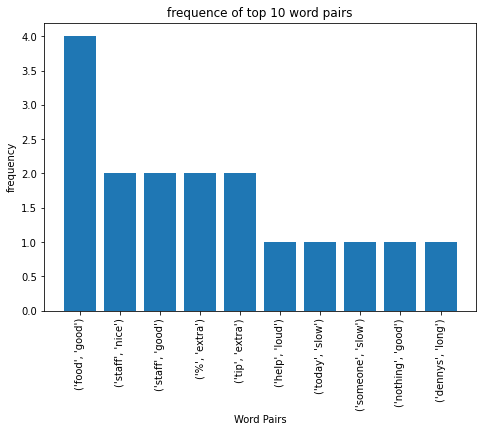

In [69]:
barplot_for_the_frequent_word_pairs(data_random_50_rating_1,10)

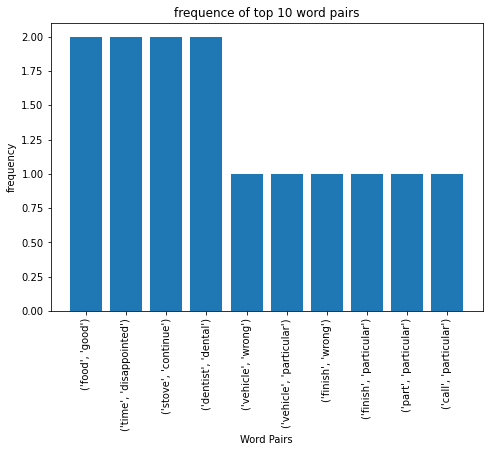

In [70]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_2,10)

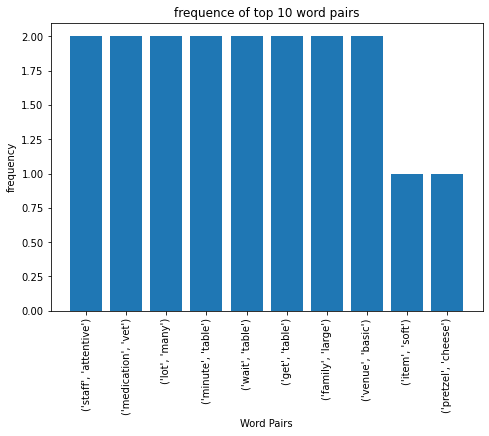

In [71]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_3,10)

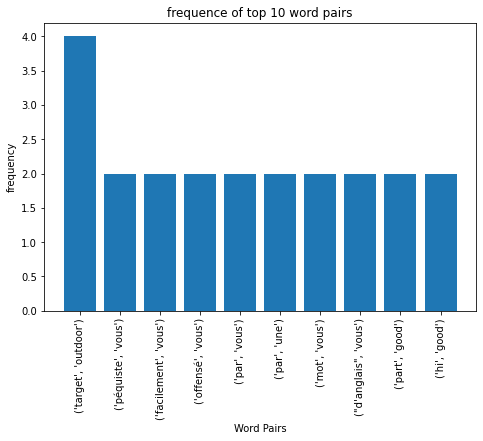

In [72]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_4,10)

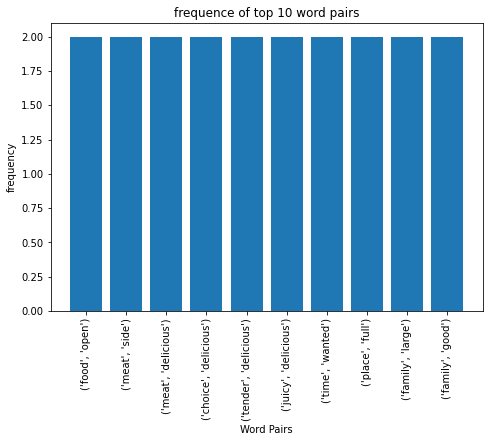

In [73]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_5,10)

# Wordclouds For Data Being Used For Each User Rating. 

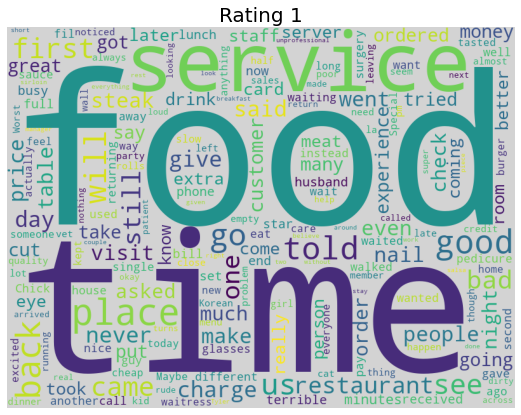

In [74]:
show_wordclouds(data_random_50_rating_1,"Rating 1")

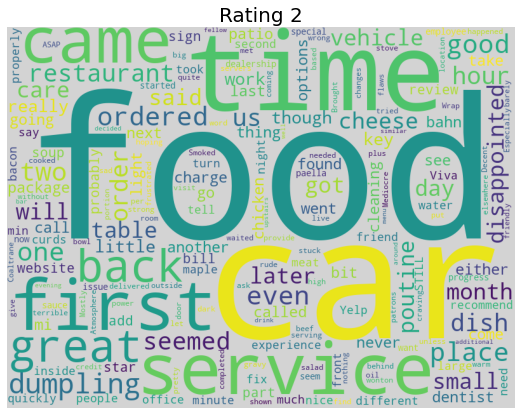

In [75]:
show_wordclouds(data_random_20_rating_2,"Rating 2")

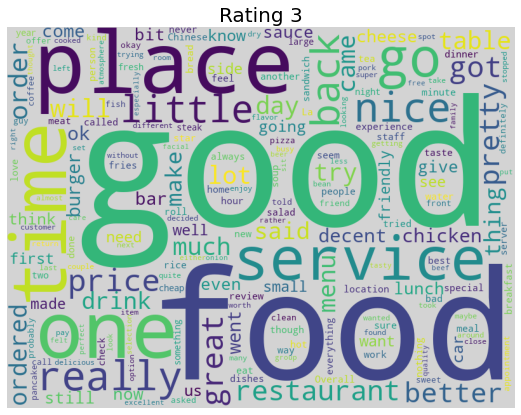

In [76]:
show_wordclouds(data_random_rating_3,"Rating 3")

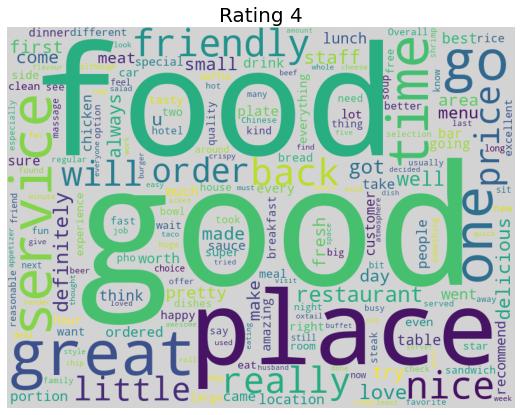

In [77]:
show_wordclouds(data_random_rating_4,"Rating 4")

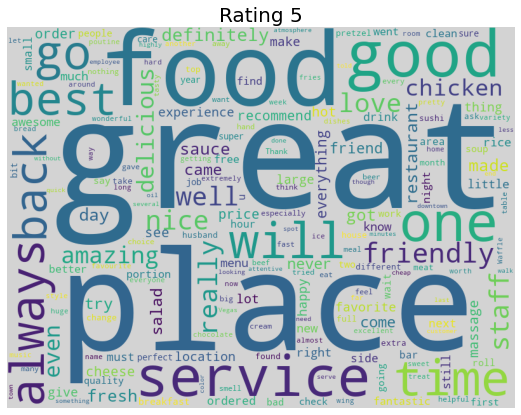

In [78]:
show_wordclouds(data_random_rating_5,"Rating 5")